<a href="https://colab.research.google.com/github/Shourya306/Supervised-Machine-Learning---Regression-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [166]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')  # Code to not show me any warnings that might arise.

pd.set_option('max_columns', None) # Code to make sure pandas shows me all the columns.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [167]:
# Reading in the dataset.
# Encoded with "latin-1" because the default encoding wasn't able to encode the large file. 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction - Challa Shourya Chandra Sai./Copy of SeoulBikeData.csv',encoding ='latin')

In [168]:
# Viewing the first 5 rows.
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [169]:
# Viewing the last 5 rows.
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [170]:
# Understading the datatype of the columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [171]:
# Understanding basic stats.
dataset.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [172]:
# Checking the shape of the dataset.
dataset.shape

(8760, 14)

## **Defining The Problem Statement**

*Understanding the difference between continous variables and discrite variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Descrite variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

*Why Choose Linear Regression to model the data?*

Linear Regression is used to model the data because we want to predict the **dependent variable(y)** which is continous in nature.

*Segregating the variables into **dependent & independent** variables[categorical or numeric continous/discrete].*

Dependent variable(Y): **Rented Bike Count**

Independent variable(X):

  * Date = Breaking the column into 3 seperate columns - Date, Month, Year.

  * Hour = Numeric Descrite Variable.

  * Temperature(°C) = Continous Variable.

  * Humidity(%) = Continous Variable.

  * Wind speed (m/s) = Continous Variable.

  * Visibility(10m) = Continous Variable.

  * Dew point temperature(°C) = Continous Variable.

  * Solar Radiation (MJ/m2) = Continous Variable.

  * Rainfall(mm) = Continous Variable.

  * Snowfall(cm) = Continous Variable.

  * Seasons = Categorical Variable of 4 classes.

  * Holiday = Categorical Variable of 2 classes.

  * Functioning Day = Categorical Variable of 2 classes.


## Data Preprocessing

Checking if there are any duplicate values in the dataset.

In [173]:
dataset[dataset.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


**We can see that there aren't any duplicate values in the dataset. It is essential to remove dublicate values in the dataset for our model to generalize the unseen data.**

Checking for null values.

In [174]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Thank god! there aren't any null values.**

Working on the date column.

In [175]:
# A simple function to extract the date of the month from the date column
def date_new(date):
  return date[:2]

In [176]:
# Applying the above written function to the date column.
dataset['new_date'] = dataset['Date'].apply(date_new)

In [177]:
# Converting the Date column dtype to datetime so that we can extract the month and the year from the date column.
dataset['Date'] = dataset['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [178]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month

In [179]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,new_date,year,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12


In [180]:
dataset['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [181]:
dataset['month'].value_counts()

12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

In [182]:
dataset['new_date'].value_counts()

01    288
02    288
28    288
27    288
26    288
25    288
24    288
23    288
22    288
21    288
20    288
19    288
18    288
17    288
16    288
15    288
14    288
13    288
12    288
11    288
10    288
09    288
08    288
07    288
06    288
05    288
04    288
03    288
29    264
30    264
31    168
Name: new_date, dtype: int64

I will be dropping the date column from the dataset since we have extracted all the required information from it.

In [183]:
# Dropping the date column.
dataset.drop('Date', axis = 1, inplace = True)

In [184]:
# Renaming the new_date to date.
dataset.rename(columns = {'new_date':'date'}, inplace = True)

In [185]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  date                       8760 non-null   objec

In [186]:
# Converting the date column datatype to integer from object.
dataset['date'] = dataset['date'].astype('int64')

In [221]:
# Converting the datatype of year column into a category from object.
dataset['year'] = dataset['year'].astype('category')

## Exploratory Data Analysis

Exploratory Data Analysis is performed to understand the relationship between independent variables and dependent variable.



### EDA on Numeric Data

**Hypothesis** - Summer Months viz. March, April, May, June will see a rise in the usage of bikes because teenagers might use it during their summer breaks.

Text(0.5, 1.0, 'Month vs Rented Bike')

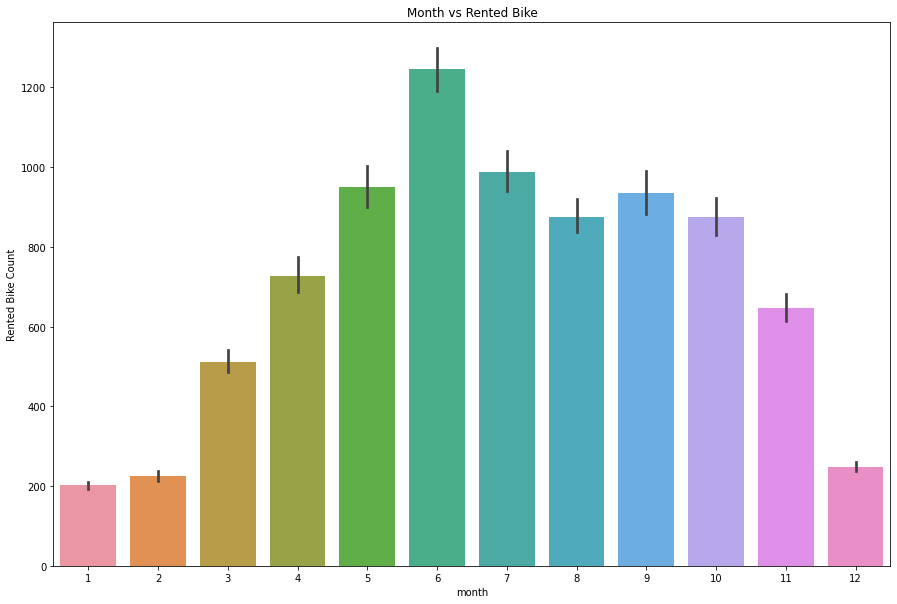

In [187]:
# Plotting a barplot on month vs rented bike
plt.figure(figsize = (15,10))
sns.barplot(x = dataset['month'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Month vs Rented Bike')

**Analysis** - My hypothesis was right, Usage of bikes are high on March, April, May, and June.

**Hypothesis** - Mornings and Evenings we might see the usage of bike augment. The working population might be using these to commute to work.

Text(0.5, 1.0, 'Hour vs Rented Bike')

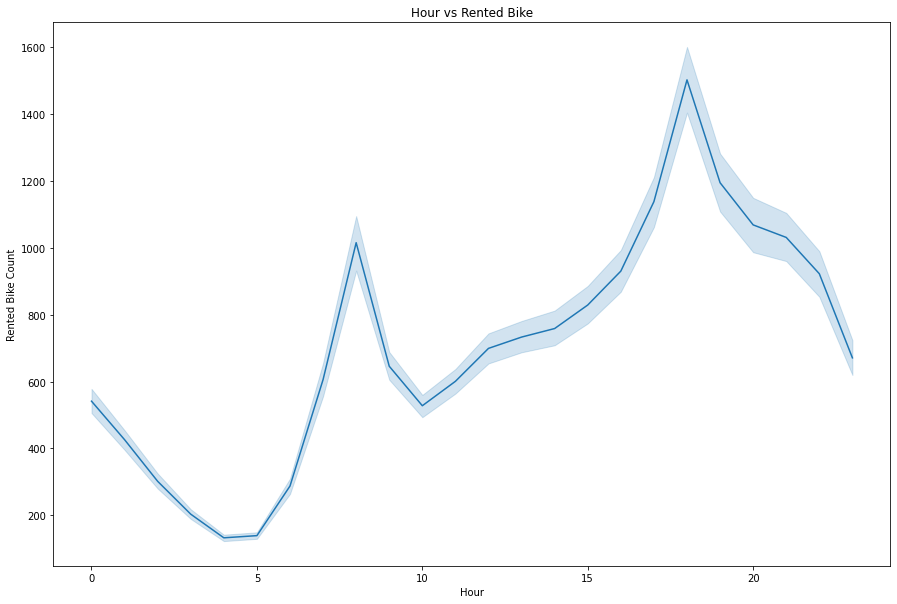

In [188]:
# Plotting a line plot on hour vs rented bike count
plt.figure(figsize = (15,10))
sns.lineplot(x = dataset['Hour'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Hour vs Rented Bike')

**Analysis** - My hypothesis is right, we can see the usage of bikes is more the mornings and evenings.

**Hypothesis** - The use of bikes will be low when the snowfall is high. 

Text(0.5, 1.0, 'Snowfall (cm) vs Rented Bike')

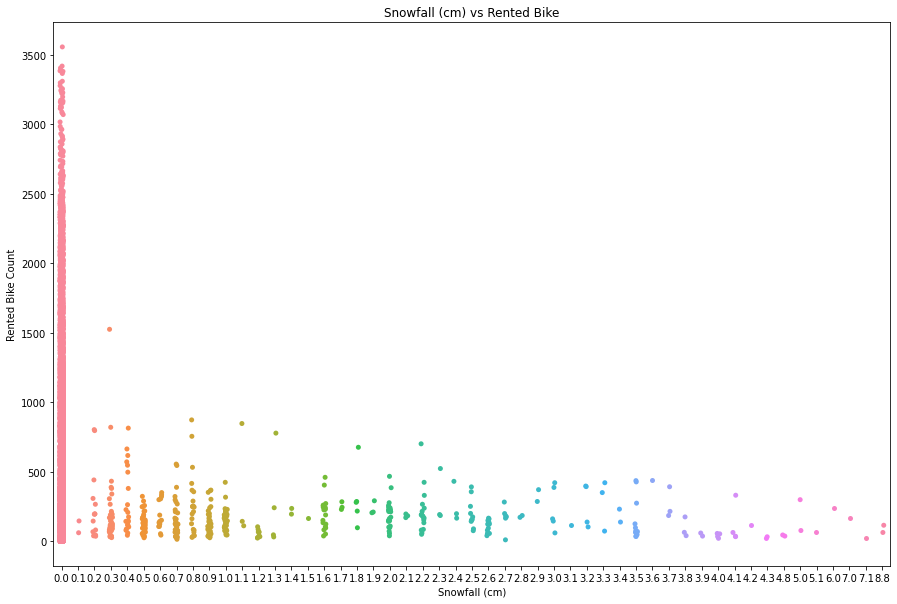

In [189]:
# Plotting a stripplot on snowfall vs rented bike plot
plt.figure(figsize = (15,10))
sns.stripplot(x = dataset['Snowfall (cm)'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Snowfall (cm) vs Rented Bike')

**Analysis** - Yayy!! my hypothesis was indeed ture.

### EDA on Categorical Data

**Hypothesis** - Usage of bikes during summer will be more when compared to other months.

Text(0.5, 1.0, 'Seasons vs Rented Bike')

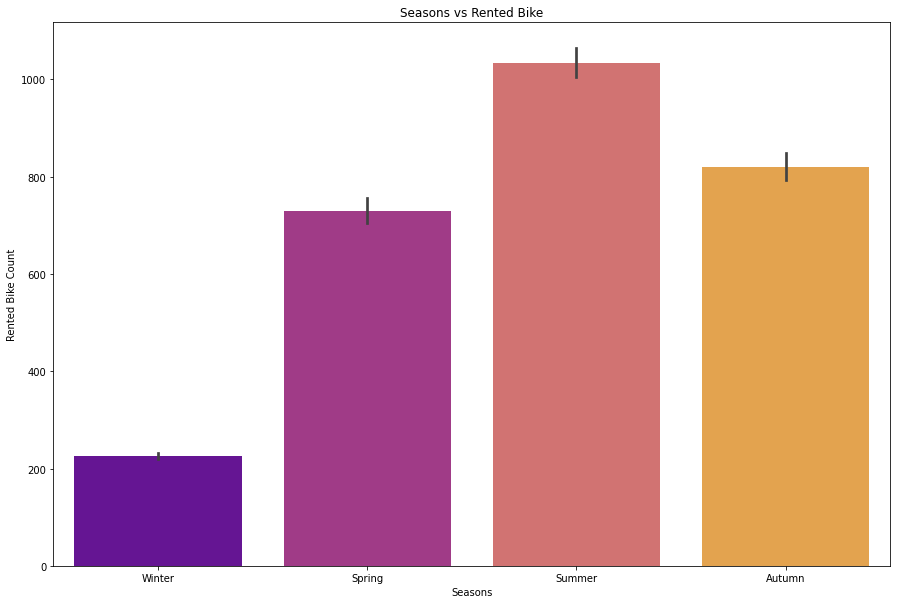

In [190]:
# Plotting a barplot on Seasons vs Rented Bike
plt.figure(figsize=(15,10))
sns.barplot(x = dataset['Seasons'], y = dataset['Rented Bike Count'], data = dataset, palette ='plasma')
plt.title('Seasons vs Rented Bike')

**Analysis** - My Hypothesis is correct.

**Hypothesis** - Usage of bikes might be more during the working days as the population might use these bikes for commuting to work.

Text(0.5, 1.0, 'Holiday vs Rented Bike')

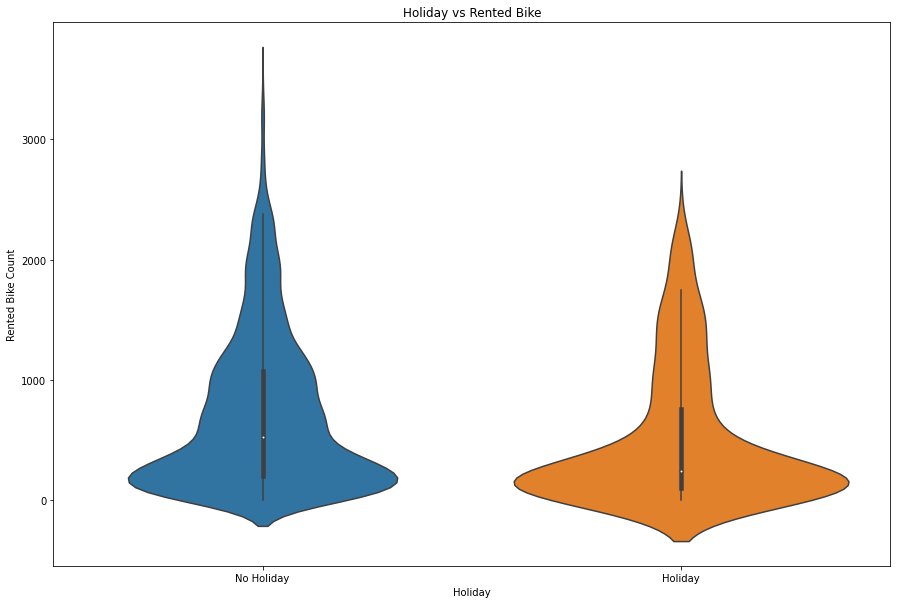

In [191]:
# Plotting a voilin plot on Holiday vs Rented Bike.
plt.figure(figsize = (15,10))
sns.violinplot(x = dataset['Holiday'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Holiday vs Rented Bike')

**Analysis** - My Hypothesis is correct.

## Linear Regression

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

* The distributions of the variables should be normal.

* Independent variables should show linear relationship with dv.

* No multicollinearity in the dataset.

* Residual mean should be 0 or close to 0.

* There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

**Before Implemeting the linear regression, we will be making sure that all the assumptions of linear regression are met.**


### Working on dependent variable.

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

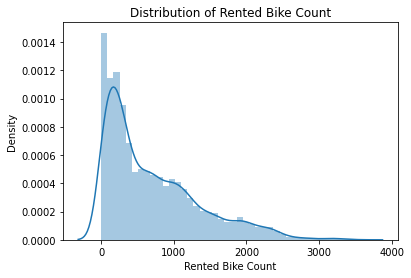

In [192]:
# Distribution of Dependent variable.
sns.distplot(dataset['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

From the above distribution plot, we can see that the distribution is right skewed. We can transform it to a normal distribution by sqaure root transformation.

Text(0.5, 1.0, 'Square_root distribution of Rented Bike Count')

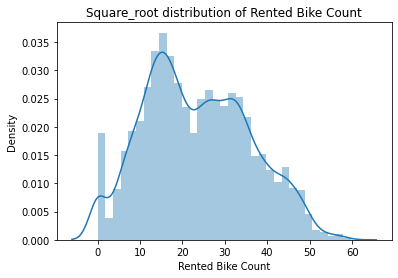

In [194]:
# Squared_root distribution of dependent variable.
square_root_transformations = np.sqrt(dataset['Rented Bike Count'])
sns.distplot(square_root_transformations)
plt.title('Square_root distribution of Rented Bike Count')

### Working on Independent Numeric Variables.

In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  date                       8760 non-null   int64

In [196]:
# Creating a list of numeric variables.
numeric_variables = dataset.describe(include = ['int64', 'float64']).columns
numeric_variables = list(set(numeric_variables) - {'Rented Bike Count','year'})
numeric_variables

['Hour',
 'Rainfall(mm)',
 'Temperature(°C)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'date',
 'Dew point temperature(°C)',
 'Wind speed (m/s)',
 'Humidity(%)',
 'month']

From the list of numeric variables, I have removed Rented Bike Count and Year. Because Rented Bike count is dependent variable and Year is a categorical variable.

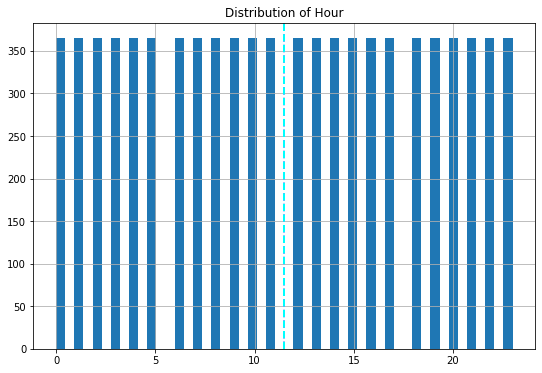

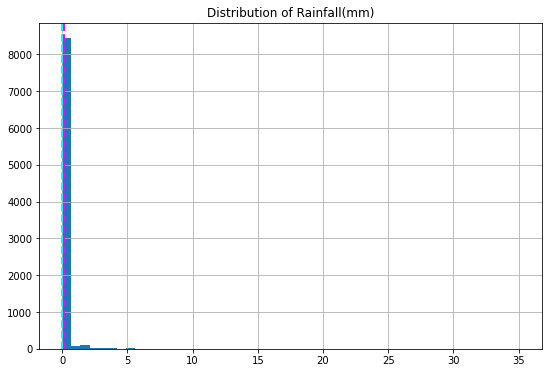

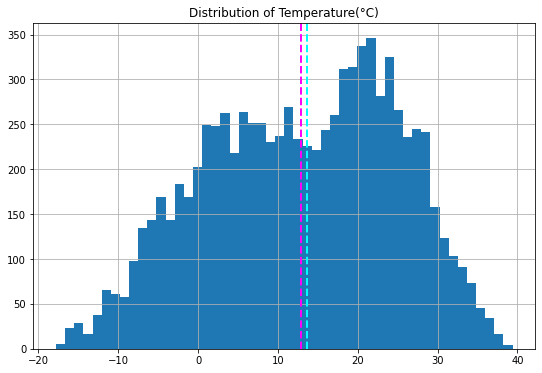

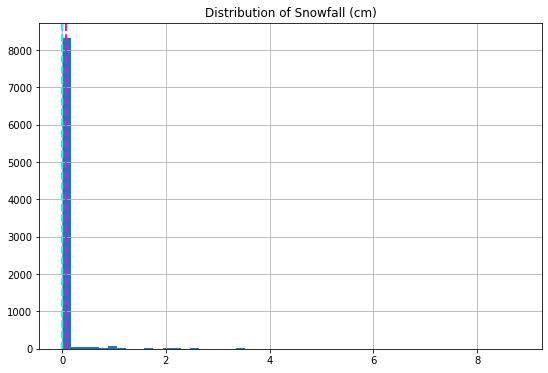

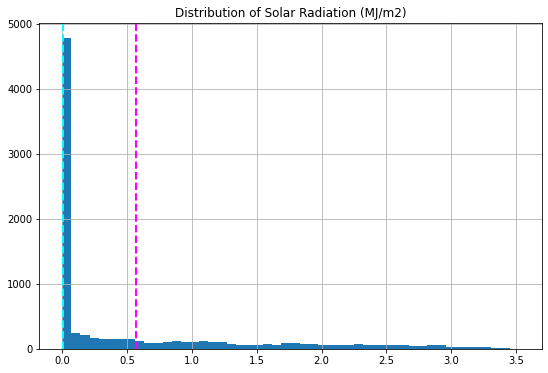

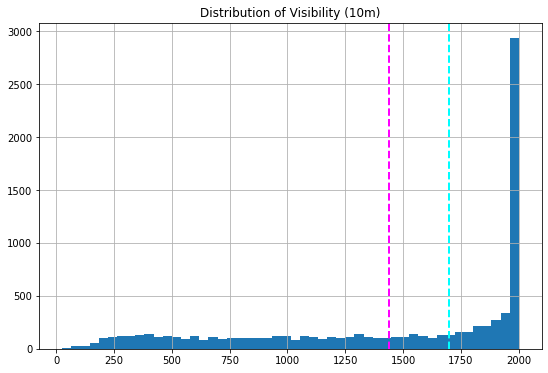

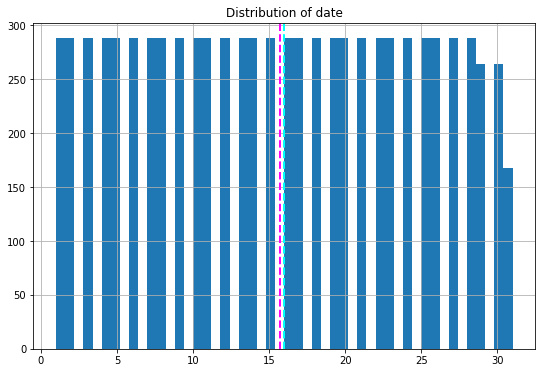

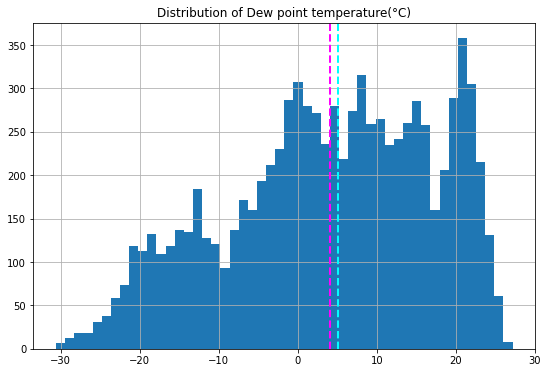

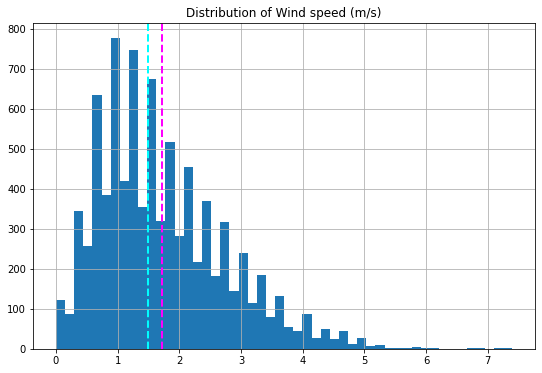

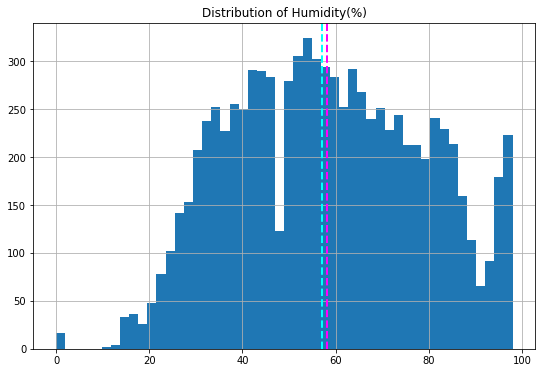

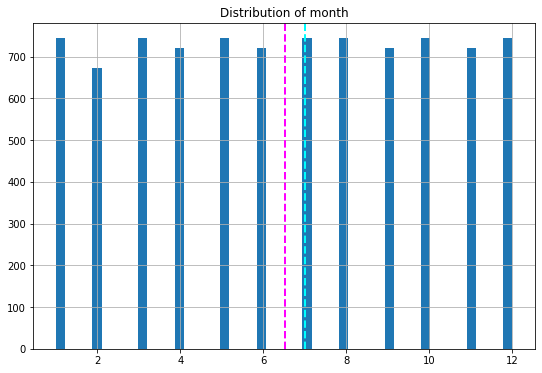

In [205]:
# Using a for loop to plot the distributions of all the numeric variables.
for col in numeric_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title('Distribution of '+ col)
plt.show()

The magenta line represents the mean of the distribution and the cyan line represents the median of the distribution.

There are a few columns whose distributions are skewed like Snowfall, solar radiation, Visibility. I will be removing the outliers for all of these columns so that there distributions will approximate to a normal distribution.

In [212]:
# Making a copy of the orginal dataset which will be used to remove the outliers from all the columns of the data.
dataset1 = dataset.copy()

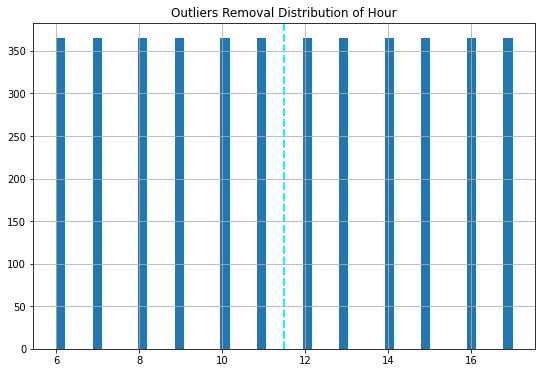

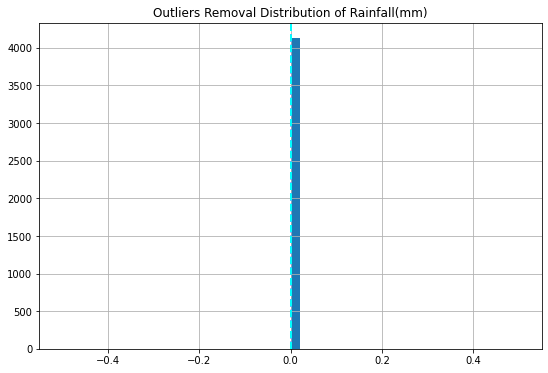

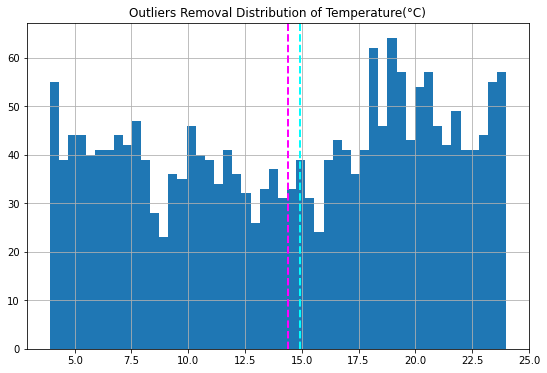

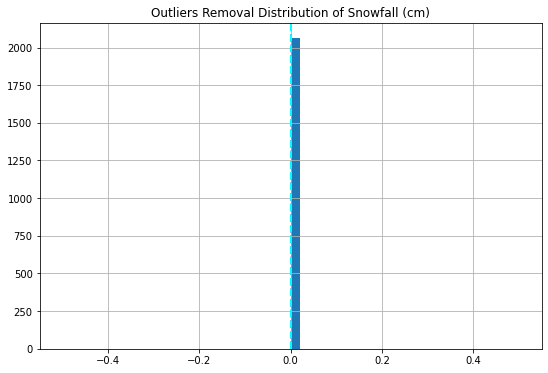

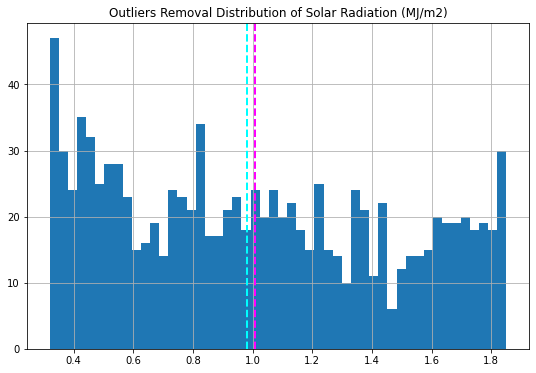

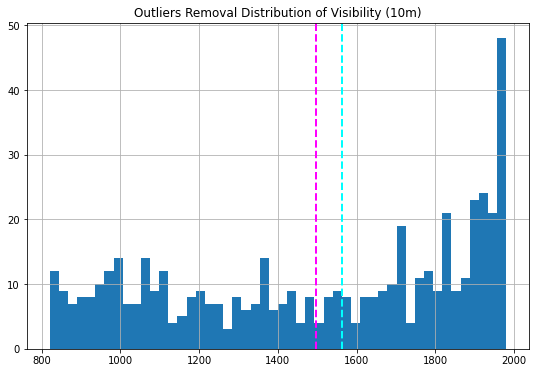

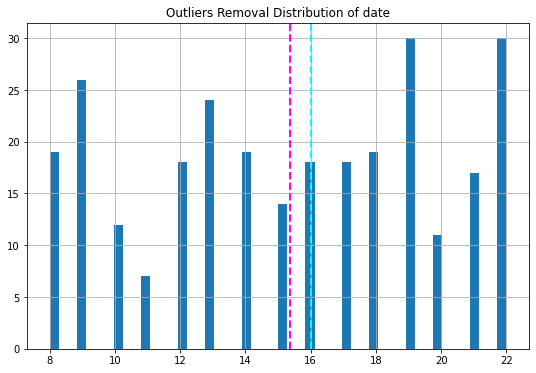

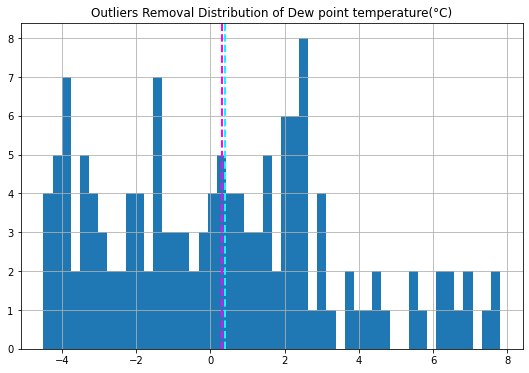

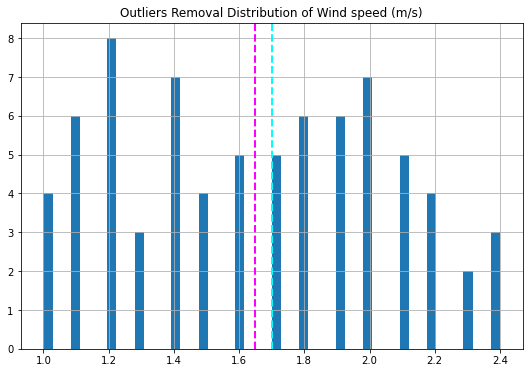

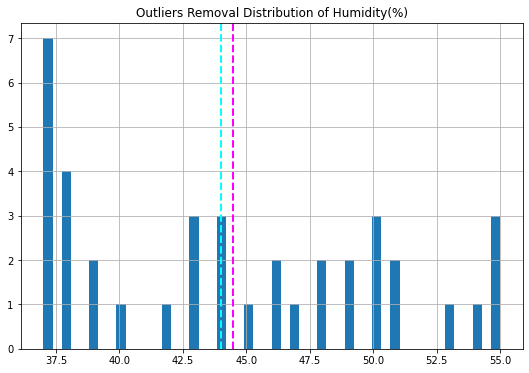

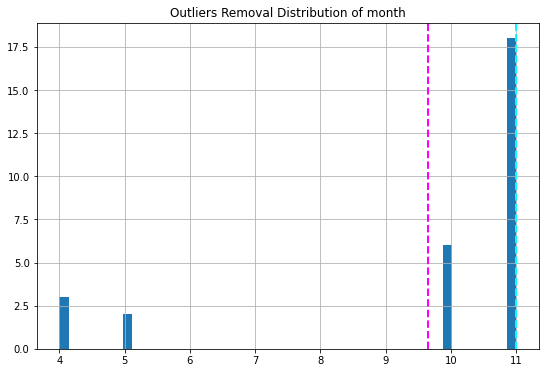

In [213]:
# Using for loop to remove the outliers which are represent in the dataset of every column.
for col in numeric_variables:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  Q1 = np.percentile(dataset1[col],25)
  Q3 = np.percentile(dataset1[col],75)
  IQR = Q3 - Q1
  dataset1 = dataset1[(dataset1[col] >= Q1) & (dataset1[col] <= Q3)]
  feature = dataset1[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title('Outliers Removal Distribution of '+ col)
plt.show()

In [214]:
dataset1.shape

(29, 16)

I won't be removing the outliers of the independent variables because if i remove the outliers for all the mumeric variables then I won't have enough data in the dataset to train my model properly.

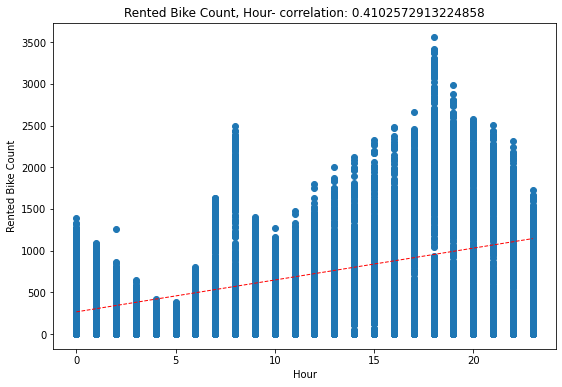

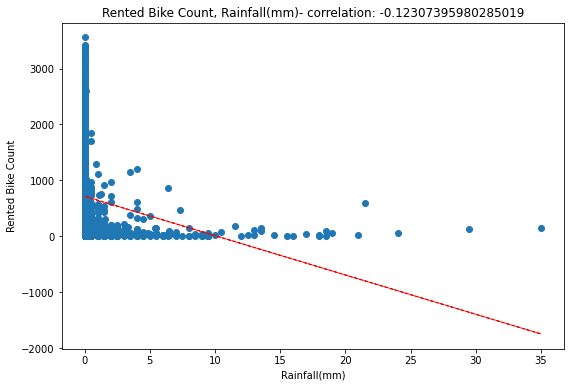

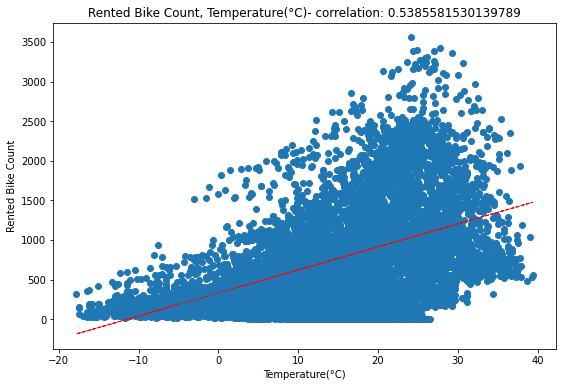

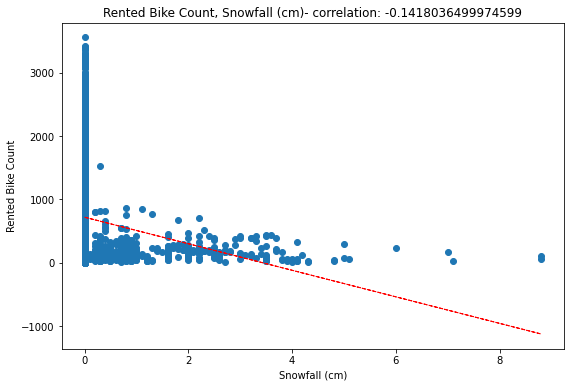

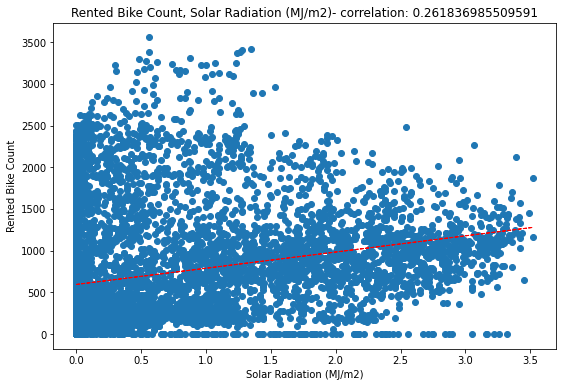

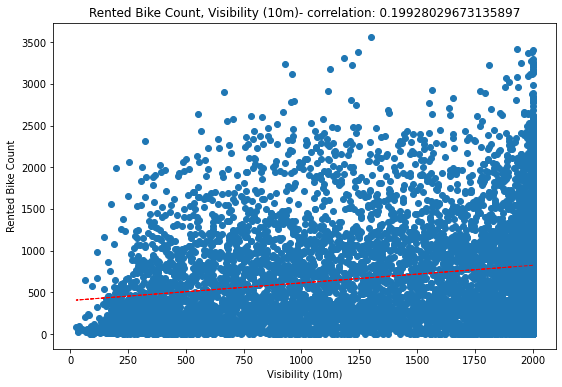

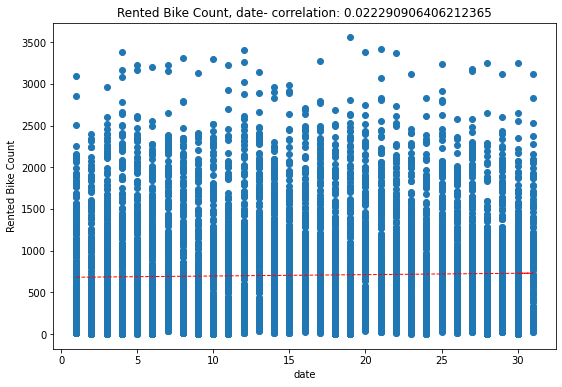

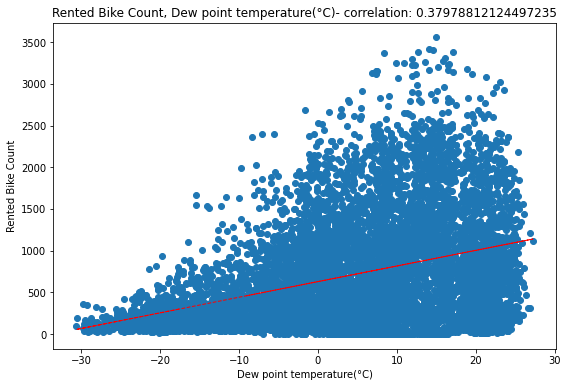

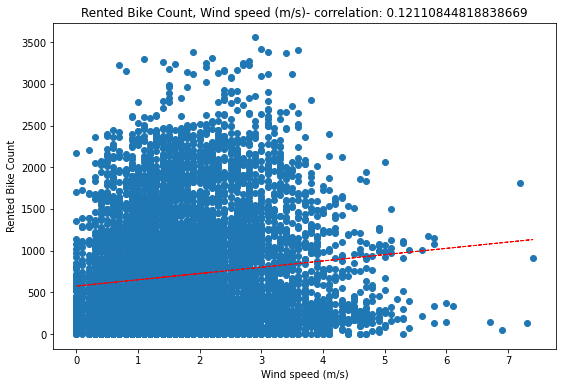

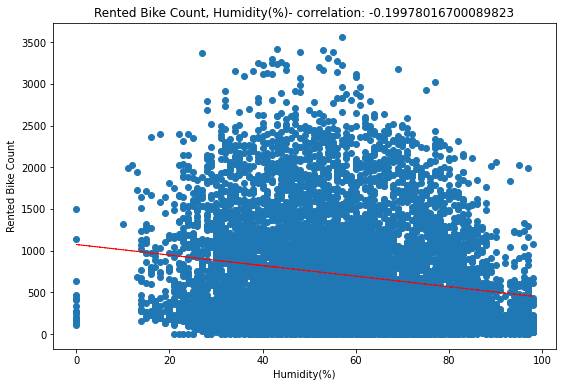

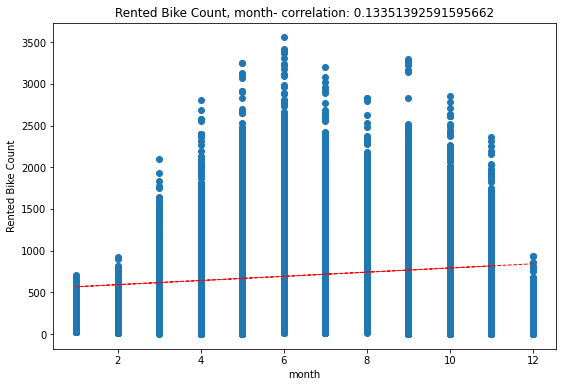

In [218]:
# Created a for loop to see if there is a linear relationship between the dependent and independent variable.
for col in numeric_variables:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = dataset[col]
   label = dataset['Rented Bike Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Rented Bike Count')
   ax.set_title('Rented Bike Count, ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
   y_hat = np.poly1d(z)(dataset[col])
 
   plt.plot(dataset[col], y_hat, "r--", lw=1)
 
plt.show()

 From the above scatter plots we can see that the relationships between dependent and independent variables is a linear one. Though not as linear as we hoped it would be, because we were not able to remove outliers.

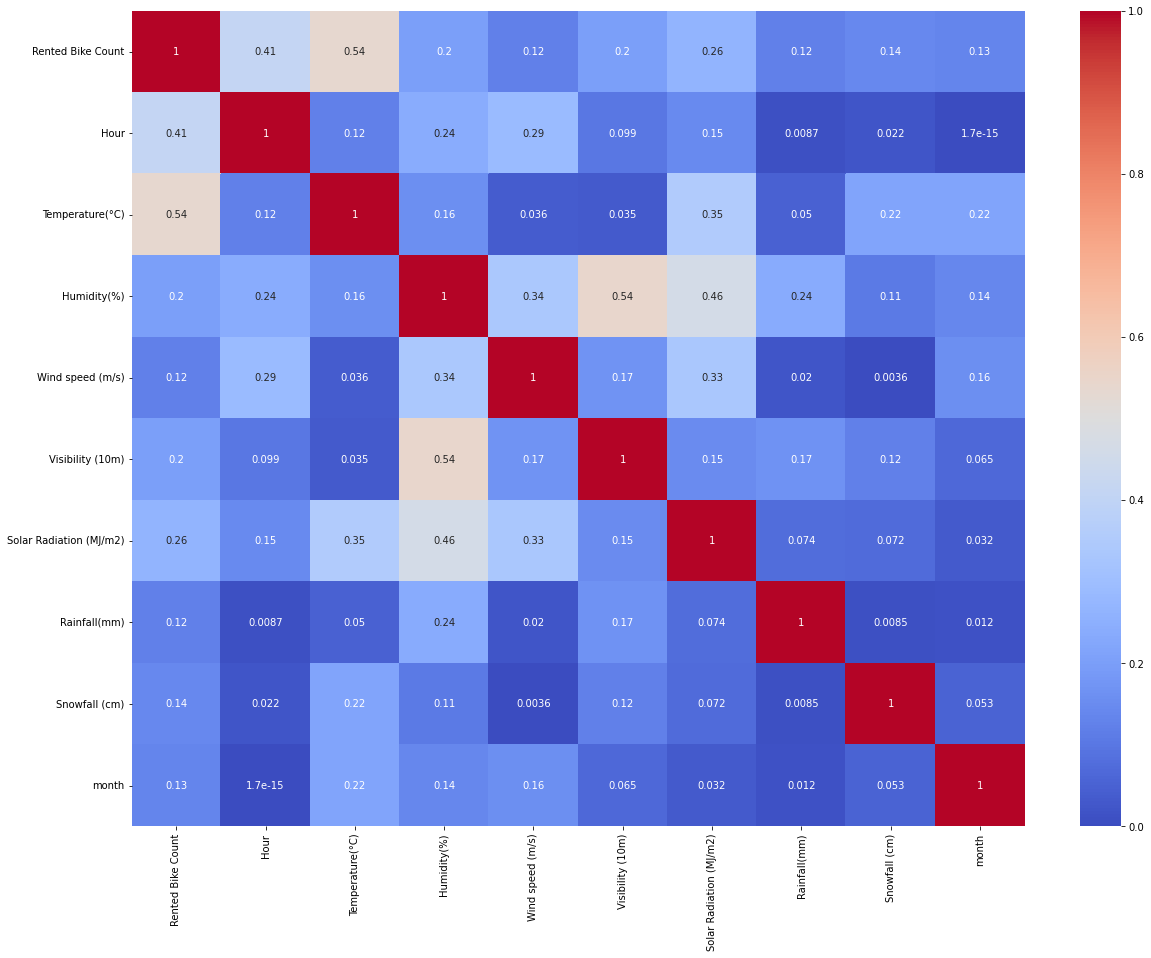

In [239]:
# Let us look at the correation table.
corr = dataset.corr()
plt.figure(figsize = (20,15))
sns.heatmap(abs(corr), cmap = 'coolwarm', annot = True)

The objective here is to find those columns that have a very low correlation with the dependent variable and dropping those columns so that we can reduce the complexity of the model that we are going to build.

From the correlation table we can see that **Date** column has a very low correlation with **Rented Bike Count** so I will drop that column.

And also since the **Dew Point Temperature** and **Temperature** are highly correlated(0.91) to each other, we can drop column.

I will drop the **Dew Point Temperature** since it relatively less correlated to rented bike count than **Temperature**.

In [231]:
# Dropping Dew Point Temperature and Date columns.
dataset.drop(['date','Dew point temperature(°C)'], inplace = True, axis = 1)

In [232]:
#Removing Multicollinearlity using VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [241]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.952873
1,Temperature(°C),3.285991
2,Humidity(%),6.034847
3,Wind speed (m/s),4.651738
4,Visibility (10m),5.339713
5,Solar Radiation (MJ/m2),2.253453
6,Rainfall(mm),1.079756
7,Snowfall (cm),1.130941
8,month,5.002899


**Objective** - Our objective hear is to make sure that the VIF of all the columns above is below 5. If the VIF of all the columns are below 5, then we can safely assume that there is no multicollinearity between the independent variables.

If you can see there is one variable(Humidity) which has a VIF of above 5.

**Approach used to reduce the VIF**- We will check what other variable has a VIF value of the same range. In this case, Visibility column has a VIF of the same range.

We will check both the variables corrrelation to confrim our finding that they indeed are correlated and remove the feature that has the lowest correlation with dependent variable(**Rented Bike Count**)

We can see both the columns have equal correlation of **.2** with **Rented Bike Count** hence we can remove any one of them.

In [245]:
dataset.drop('Humidity(%)',axis = 1, inplace = True)

In [246]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.917007
1,Temperature(°C),2.792324
2,Wind speed (m/s),4.272441
3,Visibility (10m),5.248283
4,Solar Radiation (MJ/m2),1.912091
5,Rainfall(mm),1.046903
6,Snowfall (cm),1.094612
7,month,4.035764


I have decided to remove Humidity, and the variables columns have a VIF less than 5 or close to 5.

In [249]:
# My final Numerical Variable.
final_numerical_var = list(set(dataset.describe().columns) - {'Rented Bike Count'})

In [250]:
final_numerical_var

['Hour',
 'Rainfall(mm)',
 'Temperature(°C)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Wind speed (m/s)',
 'month']

###Working on Categorical Variables.

In [252]:
# Storing all the categorical variables in a variable.
categorical_variables = dataset.describe(include = ['object','category']).columns

In [253]:
categorical_variables

Index(['Seasons', 'Holiday', 'Functioning Day', 'year'], dtype='object')

**Objective** - The objective is to encode the categorical variables so that the model can read the data in.

Categorical Variables are classified into 3 types:

* Dichotomous variables = These are those categorical variables which have only **2 classes** of categories. We can perfom binary encoding for these kind of variables.

* Ordinal Variables = These are those categorical variables which have **more than 2 classes** of categories and they signify **some order**. We can perform label encoding.

* Nominal Variables = These are those categorical variables which have **more than 2 classes** of categories and they do not signify **any order**. We can perform One hot encoding.